In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import glob


In [66]:
from RaTag.core.constructors import set_from_dir
from RaTag.core.dataIO import load_s2area
from RaTag.workflows.electron_recombination import recombination_workflow
from RaTag.scripts.run_analysis import create_run_from_config, load_config

# All Runs

[Text(0.5, 0, 'Drift field (V/cm)'),
 Text(0, 0.5, 'S2 area (mV * us)'),
 Text(0.5, 1.0, 'S2 area vs drift field for different datasets')]

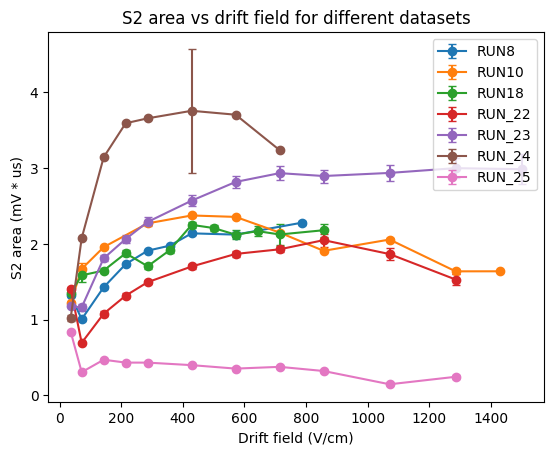

In [8]:
glob_pattern = '/Volumes/KINGSTON/RaTag_data/**/processed_data/*_s2_vs_drift.csv'
all_files = glob.glob(glob_pattern, recursive=True)
for file in all_files:
    df = pd.read_csv(file)
    plt.errorbar(df['drift_field'], df['s2_mean'], yerr=df['s2_ci95'], fmt='o-', capsize=3,
                  label=Path(file).name.replace('_s2_vs_drift.csv', ''))
plt.legend()
plt.gca().set(xlabel='Drift field (V/cm)', ylabel='S2 area (mV * us)', title='S2 area vs drift field for different datasets')

# Th228 runs

In [4]:
all_files

['/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/processed_data/RUN8_s2_vs_drift.csv',
 '/Volumes/KINGSTON/RaTag_data/RUN10_Ra226/processed_data/RUN10_s2_vs_drift.csv',
 '/Volumes/KINGSTON/RaTag_data/RUN18/processed_data/RUN18_s2_vs_drift.csv',
 '/Volumes/KINGSTON/RaTag_data/RUN22_Th228/processed_data/RUN_22_s2_vs_drift.csv',
 '/Volumes/KINGSTON/RaTag_data/RUN23_Ra224/processed_data/RUN_23_s2_vs_drift.csv',
 '/Volumes/KINGSTON/RaTag_data/RUN24_Ra224_EL2700/processed_data/RUN_24_s2_vs_drift.csv',
 '/Volumes/KINGSTON/RaTag_data/RUN25_Ra224_EL1100/processed_data/RUN_25_s2_vs_drift.csv']

[Text(0.5, 0, 'Drift field (V/cm)'),
 Text(0, 0.5, 'S2 area (mV * us)'),
 Text(0.5, 1.0, 'Th228 datasets $E_{EL}$ = 2350 V/cm')]

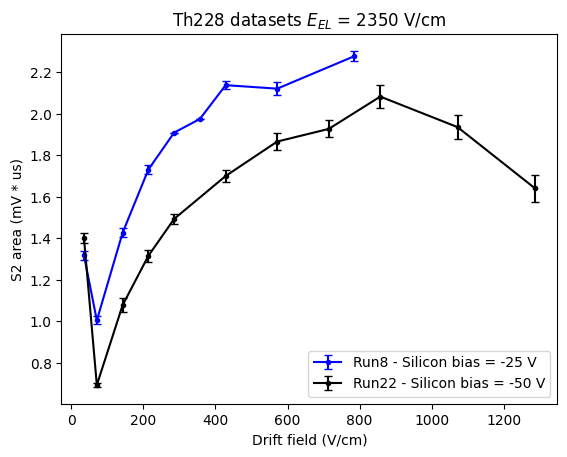

In [91]:
files_th = ['/Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/processed_data/RUN8_s2_vs_drift.csv',
             '/Volumes/KINGSTON/RaTag_data/RUN22_Th228/processed_data/RUN_22_s2_vs_drift.csv']

labels = ['Run8 - Silicon bias = -25 V',
           'Run22 - Silicon bias = -50 V']
colors = ['blue', 'k']

for i, file in enumerate(files_th):
    df = pd.read_csv(file)
    plt.errorbar(df['drift_field'], df['s2_mean'], yerr=df['s2_ci95'], fmt='.-', capsize=3, color=colors[i],
                 label=labels[i])
plt.legend()
plt.gca().set(xlabel='Drift field (V/cm)', ylabel='S2 area (mV * us)', title='Th228 datasets $E_{EL}$ = 2350 V/cm')

# Ra224

[Text(0.5, 0, 'Drift field (V/cm)'),
 Text(0, 0.5, 'S2 area (mV * us)'),
 Text(0.5, 1.0, 'Ra224 datasets')]

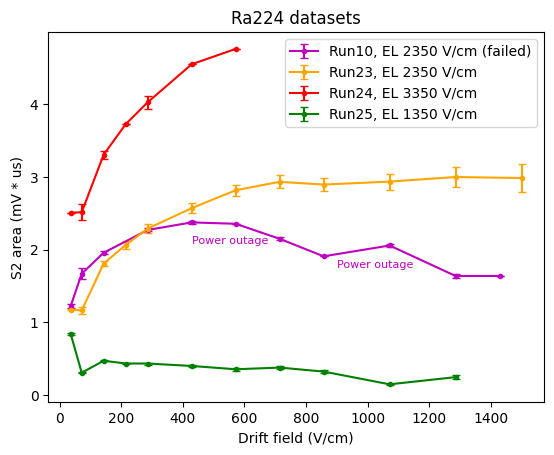

In [108]:
files_ra = ['/Volumes/KINGSTON/RaTag_data/RUN10_Ra226/processed_data/RUN10_s2_vs_drift.csv',
             '/Volumes/KINGSTON/RaTag_data/RUN23_Ra224/processed_data/RUN_23_s2_vs_drift.csv',
             '/Volumes/KINGSTON/RaTag_data/RUN24_Ra224_EL2700/processed_data/RUN_24_s2_vs_drift.csv',
             '/Volumes/KINGSTON/RaTag_data/RUN25_Ra224_EL1100/processed_data/RUN_25_s2_vs_drift.csv']

labels_ra = ['Run10, EL 2350 V/cm (failed)',
           'Run23, EL 2350 V/cm',
           'Run24, EL 3350 V/cm',
           'Run25, EL 1350 V/cm']

colors = ['m', 'orange', 'r', 'g']
for i, file in enumerate(files_ra):
    df = pd.read_csv(file)
    plt.errorbar(df['drift_field'], df['s2_mean'], yerr=df['s2_ci95'], fmt='.-', capsize=3, color=colors[i],
                 label=labels_ra[i])
plt.annotate(xy=(428.571000, 2.075), text='Power outage', fontsize=8, color='m')
plt.annotate(xy=(900, 1.75), text='Power outage', fontsize=8, color='m')
plt.legend()
plt.gca().set(xlabel='Drift field (V/cm)', ylabel='S2 area (mV * us)', title='Ra224 datasets')

# Compare Th228, Ra224 with same EL field (runs 22 and 23)

[Text(0.5, 0, 'Drift field (V/cm)'),
 Text(0, 0.5, 'S2 area (mV * us)'),
 Text(0.5, 1.0, 'Compare Th228 and Ra224 at same EL field (2350 V/cm)')]

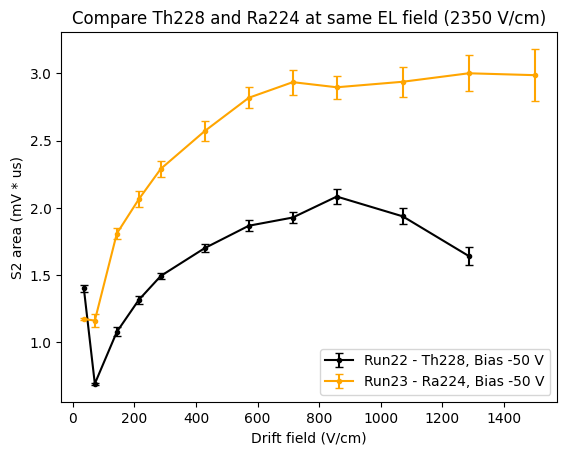

In [107]:
files = ['/Volumes/KINGSTON/RaTag_data/RUN22_Th228/processed_data/RUN_22_s2_vs_drift.csv',
        '/Volumes/KINGSTON/RaTag_data/RUN23_Ra224/processed_data/RUN_23_s2_vs_drift.csv']

labels = ['Run22 - Th228, Bias -50 V',
           'Run23 - Ra224, Bias -50 V']
colors = ['k', 'orange']
for i, file in enumerate(files):
    df = pd.read_csv(file)
    plt.errorbar(df['drift_field'], df['s2_mean'], yerr=df['s2_ci95'], fmt='.-', capsize=3, color=colors[i],
                 label=labels[i])
plt.legend()
plt.gca().set(xlabel='Drift field (V/cm)', ylabel='S2 area (mV * us)', title='Compare Th228 and Ra224 at same EL field (2350 V/cm)')

# Gate vs EL_field/drift_field graph for different ΔV values

dv: 1100, len(gates): [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000]
dv: 1500, len(gates): [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600]
dv: 1900, len(gates): [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200]
dv: 2300, len(gates): [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]
dv: 2700, len(gates): [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]


[(1.5, 10.0)]

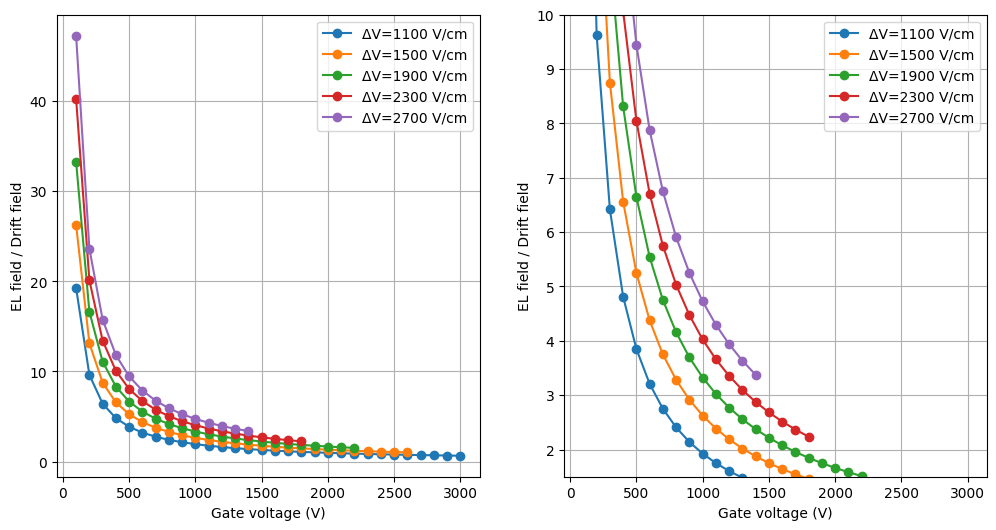

In [9]:
dvs = [1100, 1500, 1900, 2300, 2700]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
for dv in dvs:
    anodes = range(100 + dv, 4200, 100)
    gates = [a - dv for a in anodes]
    print(f'dv: {dv}, len(gates): {gates}')
    drift_gap = 1.4
    el_gap = 0.8
    fields = np.array([g / drift_gap for g in gates])
    el_fields = np.array([dv / el_gap for a in anodes])
    ax1.plot(gates, el_fields / fields, 'o-', label=f'ΔV={dv} V/cm')
    ax2.plot(gates, el_fields / fields, 'o-', label=f'ΔV={dv} V/cm')

for ax in [ax1, ax2]:
    ax.set(xlabel='Gate voltage (V)',  ylabel='EL field / Drift field')
    ax.grid()
    ax.legend()

ax2.set(ylim=(1.5, 10))

# plt.gcf().savefig('/Users/pabloherrero/sabat/RaTagging/figures_paper/Field_amplif_vs_gate_voltage', dpi=300 )

# Transform to S2 areas to recombination plots

Processing config: run8_analysis.yaml
RECOMBINATION ANALYSIS

[1/4] Loading X-ray calibration results...
  → g_S2: 0.0036 ± 0.0001 mV·µs/electron
  → W factor: 22 eV

[2/4] Computing expected number of electrons from recoil energy...
  → Expected number of electrons: 4400.0 e-

[3/4] Computing recombination fractions...
  → Loaded fitted ion S2 areas for 9 drift field points
  → Recombination fractions computed for 9 field points
  → r range: [0.856, 0.936]

[4/4] Plotting and storing recombination results...
  → Recombination results stored at: /Volumes/KINGSTON/RaTag_data/RUN8_EL2350Vcm_5GSsec/processed_data/RUN8_recomb_factors.csv

CALIBRATION COMPLETE
Processing config: run10_analysis.yaml
RECOMBINATION ANALYSIS

[1/4] Loading X-ray calibration results...
  → g_S2: 0.0036 ± 0.0001 mV·µs/electron
  → W factor: 22 eV

[2/4] Computing expected number of electrons from recoil energy...
  → Expected number of electrons: 4400.0 e-

[3/4] Computing recombination fractions...
  → Loaded fi

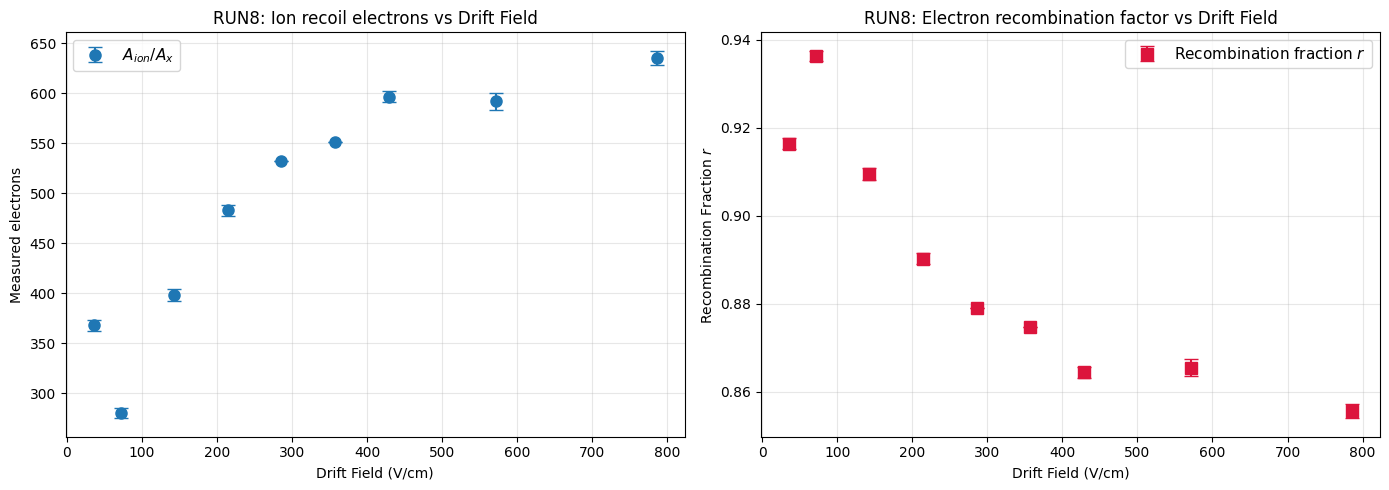

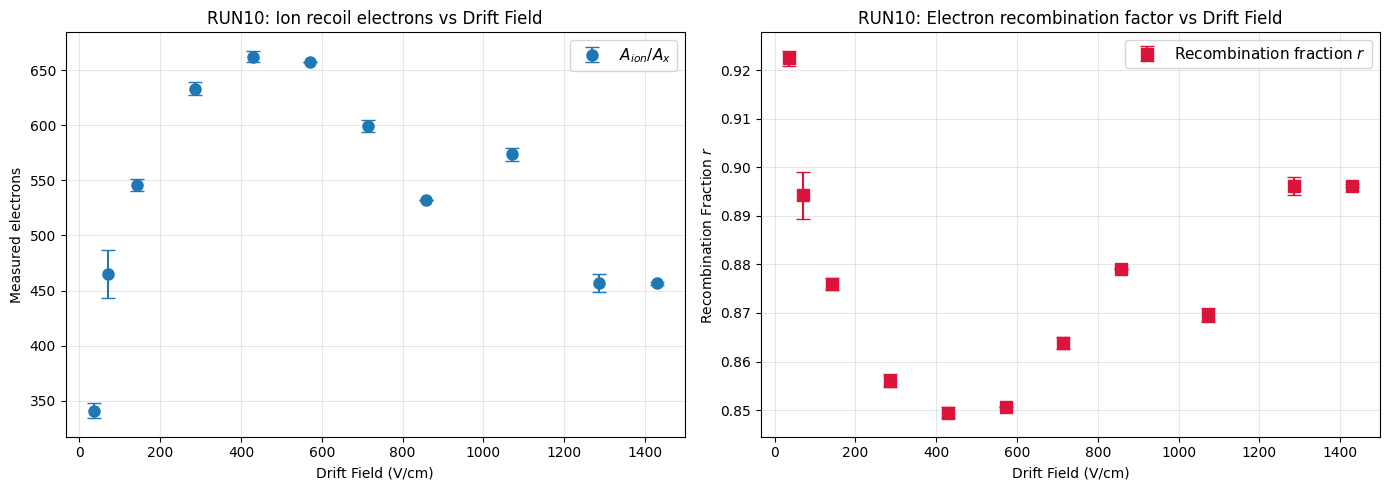

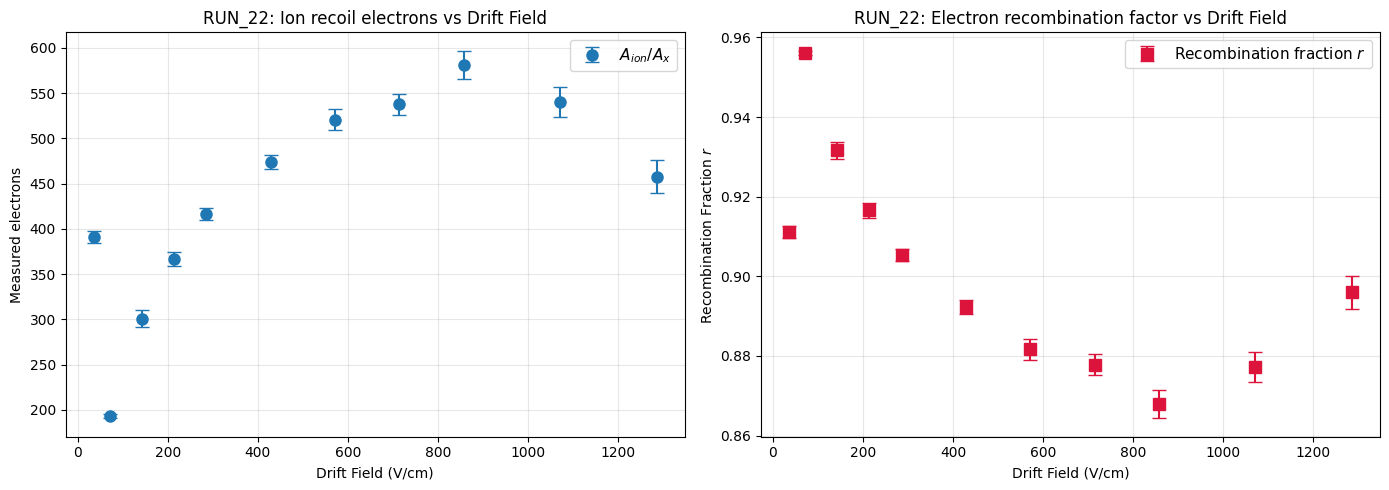

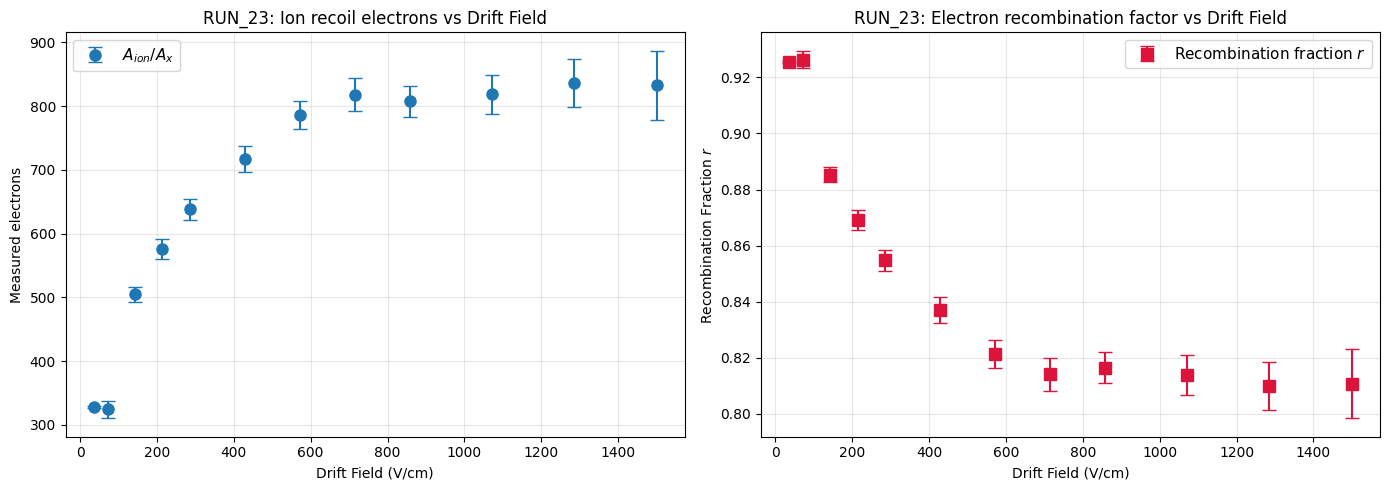

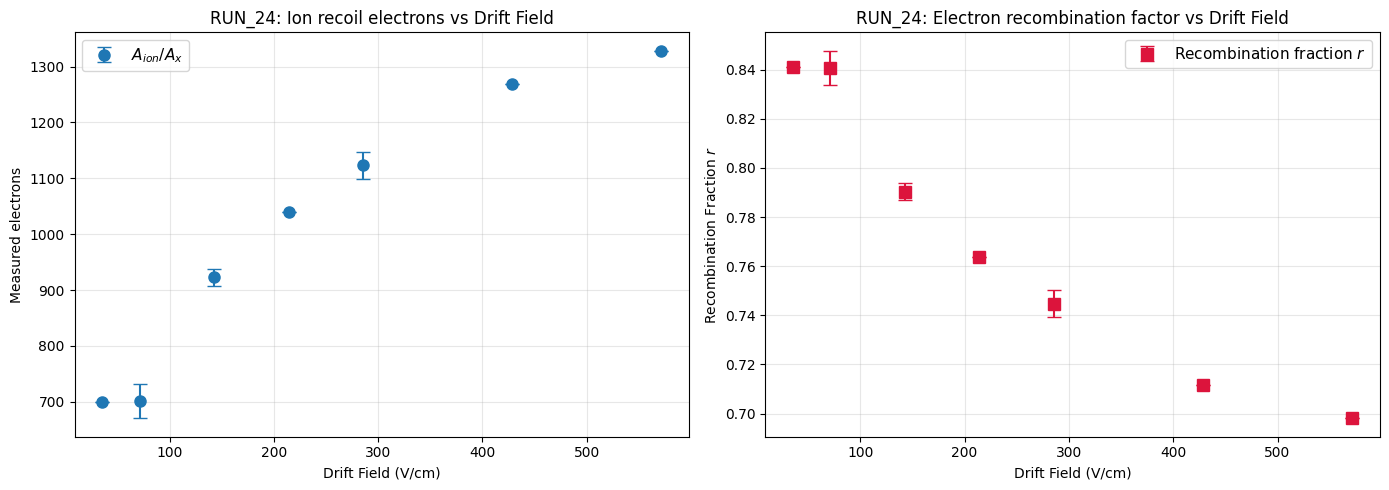

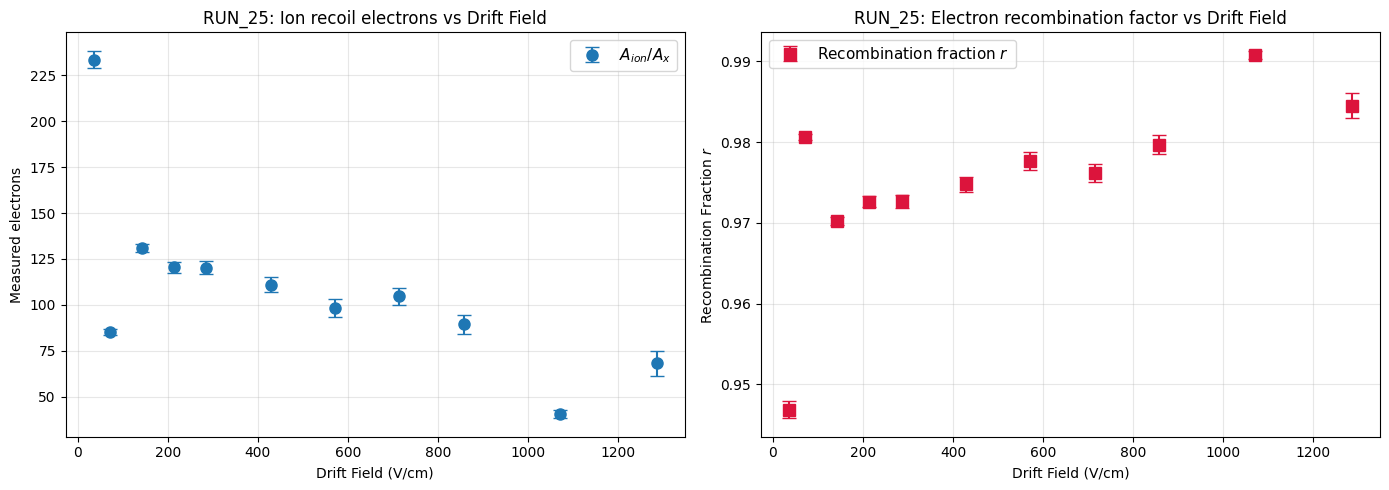

In [72]:


config_paths = ['/Users/pabloherrero/sabat/RaTagging/configs/run8_analysis.yaml',
                '/Users/pabloherrero/sabat/RaTagging/configs/run10_analysis.yaml',
                '/Users/pabloherrero/sabat/RaTagging/configs/run22_analysis.yaml',
                '/Users/pabloherrero/sabat/RaTagging/configs/run23_analysis.yaml',
                '/Users/pabloherrero/sabat/RaTagging/configs/run24_analysis.yaml',
                '/Users/pabloherrero/sabat/RaTagging/configs/run25_analysis.yaml']

path_gs2 = '/Volumes/KINGSTON/RaTag_data/RUN21_xrays/processed_data/xray_calibration_results.json'

for config_path in config_paths:
    print(f'Processing config: {Path(config_path).name}')
    config = load_config(Path(config_path))
    run = create_run_from_config(config)
    df_recomb = recombination_workflow(run, path_gs2)

# Inspect and fix fits

Detected single-isotope files...


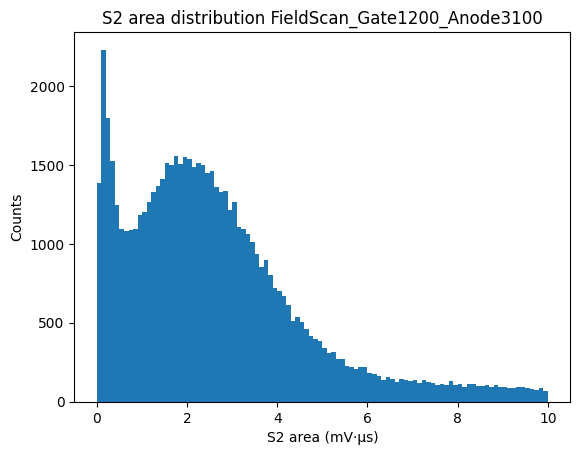

In [51]:
dirr = Path('/Volumes/KINGSTON/RaTag_data/RUN22_Th228/FieldScan_Gate1200_Anode3100')
setr = set_from_dir(dirr)
s6a = load_s2area(setr)
plt.hist(s6a.areas, range = (0, 10), bins=100);
plt.gca().set(title=f'S2 area distribution {setr.source_dir.name}', xlabel='S2 area (mV·µs)', ylabel='Counts');

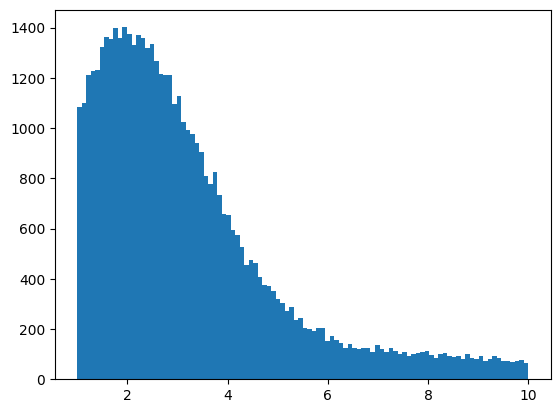

In [53]:
areas = s6a.areas
lower_bound = 1.0
upper_limit = 10
mask = (areas > lower_bound) & (areas < upper_limit)
areas = areas[mask]
n, bins, _ = plt.hist(areas, range = (lower_bound, upper_limit), bins=100);
cbins = 0.5 * (bins[1:] + bins[:-1])

User defined signal region: [1, 10]
 Found main cluster in f[1.045 1.135 1.225 1.315 1.405 1.495 1.585 1.675 1.765 1.855 1.945 2.035
 2.125 2.215 2.305 2.395 2.485 2.575 2.665 2.755 2.845 2.935 3.025 3.115
 3.205 3.295 3.385 3.475 3.565 3.655 3.745 3.835 3.925 4.015 4.105 4.195
 4.285 4.375 4.465 4.555 4.645 4.735 4.825 4.915 5.005 5.095 5.185 5.275
 5.365 5.455 5.545 5.635 5.725 5.815 5.905 5.995 6.085 6.175 6.265 6.355
 6.445 6.535 6.625 6.715 6.805 6.895 6.985 7.075 7.165 7.255 7.345 7.435
 7.525 7.615 7.705 7.795 7.885 7.975 8.065 8.155 8.245 8.335 8.425 8.515
 8.605 8.695 8.785 8.875 8.965 9.055 9.145 9.235 9.325 9.415 9.505 9.595
 9.685 9.775 9.865 9.955]


/Users/pabloherrero/sabat/RaTagging/RaTag/core/fitting.py:295: RuntimeWarning: invalid value encountered in power
  


{'peak_position': np.float64(2.0183330525529444),
 'peak_stderr': np.float64(0.017425110673620733),
 'sigma': np.float64(1.6102427338443417),
 'beta': np.float64(1.3605134441937135),
 'm': np.float64(1.5532726945313553),
 'chi2': np.float64(60394.21166851609),
 'redchi': np.float64(635.7285438791167)}

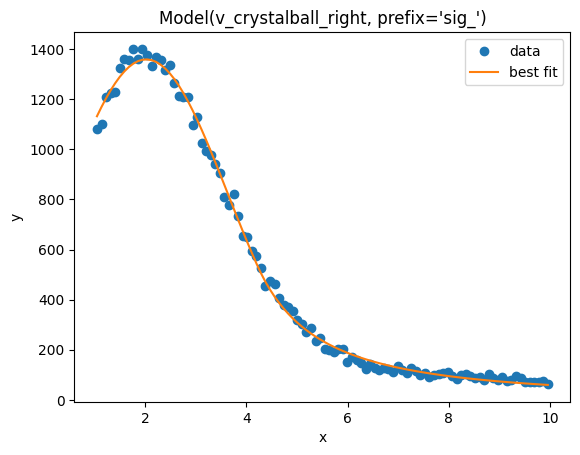

In [56]:
from RaTag.core.fitting import _fit_signal_crystalball
n_sig = n[n > 0]
cbins_sig = cbins[n > 0]
params, result = _fit_signal_crystalball(cbins_sig, n_sig, lower_bound=1, upper_limit=10)
result.plot_fit()
params

In [44]:
params

{'peak_position': np.float64(4.918766350358634),
 'peak_stderr': np.float64(0.04238017892459751),
 'sigma': np.float64(1.4999999999440665),
 'beta': np.float64(0.8953737679173617),
 'm': np.float64(9.999999969806662),
 'chi2': np.float64(8497.451065455121),
 'redchi': np.float64(89.44685332058023)}